In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
birthDF = pd.read_csv('data/births.txt',header=None,index_col=0)
birthDF.columns = ['남아수','여아수']
birthDF.index.name = '년도'
birthDF

,남아수,여아수
년도,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


# 1. 남아 ,여아 출생 평균을 구하시요

In [3]:
print("남아 출생 평균 :" ,round(birthDF['남아수'].mean(),2))
print("여아 출생 평균 :" ,round(birthDF['여아수'].mean(),2))

남아 출생 평균 : 1225776.07
여아 출생 평균 : 1245399.21



<pre>
'''
2. 2000년대 이후데이터를 구하시요
년도   남아   여아
==============
2000     xx     xx
'''
</pre>

In [4]:
birthDF[birthDF.index >=2000]

,남아수,여아수
년도,,
2000,1814601,1962406
2001,1799049,1941251
2002,1795206,1939815
2003,1825359,1973434
2004,1834145,1982794
2005,1845379,1994841
2006,1898463,2052377
2007,1919408,2072139
2008,1887234,2036289


# 3. 남아출생이 가장많은 년도와 남아수를 구하시요.

In [5]:
birthDF[birthDF['남아수']==birthDF['남아수'].max()][['남아수']]

,남아수
년도,
1957,2044160


# 4. 남아출생이 가장많은 top5 를 구하시요(년도와 남아수)

In [6]:
birthDF['남아수'].nlargest(5)

년도
1957    2044160
1959    2023044
1960    2022093
1961    2017316
1958    2010884
Name: 남아수, dtype: int64

# 5. 남아율(%) 을 구하고 각년도별 남아수가 차지하는비율을 데이터로 보여주시요.


<pre>
남아    여아    남아율
===================
..
</pre>

In [7]:
# 전체 남아율
round(birthDF['남아수'].sum()/(birthDF['남아수'].sum()+birthDF['여아수'].sum())*100,2)

49.6

In [8]:
birthDF['남아율']= round((birthDF['남아수']/(birthDF['남아수']+birthDF['여아수']))*100,2)
birthDF

,남아수,여아수,남아율
년도,,,
1880,90993,110491,45.16
1881,91954,100745,47.72
1882,107850,113688,48.68
1883,112321,104629,51.77
1884,129022,114445,52.99
...,...,...,...
2007,1919408,2072139,48.09
2008,1887234,2036289,48.10
2009,1832925,1979303,48.08


In [9]:
birthDF.drop(columns='남아율',inplace=True)

# 6. 2000년도 이후데이터 에 대해 출생량 을 구하고 남아수가 1800000 이상이면 '많음'아니면 '적음' 이라고 보여 주시요

<pre>
	남아수 출생량
2000   1233   '많음'
2001   1234   '적음'
</pre>

In [10]:
Birth_2000 = birthDF.loc[2000:]
Birth_2000['출생량'] = Birth_2000['남아수'].apply( lambda v: '많음' if v >= 1800000 else '적음')
Birth_2000

<ipython-input-10-31854e7f6d0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Birth_2000['출생량'] = Birth_2000['남아수'].apply( lambda v: '많음' if v >= 1800000 else '적음')


,남아수,여아수,출생량
년도,,,
2000,1814601,1962406,많음
2001,1799049,1941251,적음
2002,1795206,1939815,적음
2003,1825359,1973434,많음
2004,1834145,1982794,많음
2005,1845379,1994841,많음
2006,1898463,2052377,많음
2007,1919408,2072139,많음
2008,1887234,2036289,많음


# 7. 1800년대,1900년대,2000년대 각 남아,여야수 평균을 구하시요

In [11]:
print('1800년대 남아수 여아수 평균')
print(birthDF.query('1800<=년도<1900').mean())
print('='*25)
print('1900년대 남아수 여아수 평균')
print(birthDF.query('1900<=년도<2000').mean())
print('='*25)
print('2000년대 남아수 여아수 평균')
print(birthDF.query('2000<=년도').mean())

1800년대 남아수 여아수 평균
남아수    176714.15
여아수    111820.55
dtype: float64
1900년대 남아수 여아수 평균
남아수    1362901.51
여아수    1384145.55
dtype: float64
2000년대 남아수 여아수 평균
남아수    1.831501e+06
여아수    1.978478e+06
dtype: float64


# 8.  여아 25%~75%사이의 값을 구하시요

In [12]:
birthDF_girl = birthDF.loc[2000:].drop(columns='남아수')
birthDF_girl.quantile([0.25,0.75])

,여아수
0.25,1940892.0
0.75,2005203.0


# 9. 2000년대 남아데이터를 바차트로 그리시요.

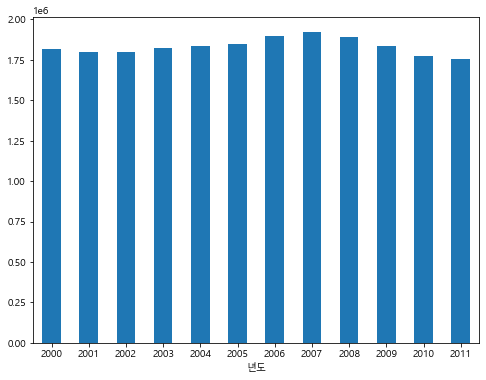

In [13]:
birthDF_boy = birthDF.loc[2000:].drop(columns='여아수')
birthDF_boy.plot(kind='bar',figsize=(8,6), rot=0 , legend= None)
plt.show()

# 10. 여아수가 가장 적은년도와 여아수를 구하시오.

In [14]:
birthDF_girl.nsmallest(5,columns='여아수')

,여아수
년도,
2011,1893230
2010,1913851
2002,1939815
2001,1941251
2000,1962406


## 11. 2000년 이후 남아수 여아수를 바차트로 나타내시오

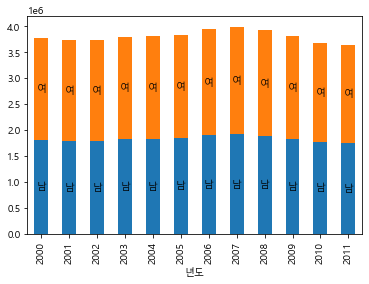

In [15]:
birth_21c =birthDF[birthDF.index >=2000]
birth_21c.plot( kind = 'bar', stacked=True, legend= None)  # stacked 를 주며 총점수 알수있음

n = 0
for i, sr in birth_21c.iterrows():
    b , g = ( sr['남아수'], sr['여아수'])
#     plt.text(n,b/2,f'{b}' ,va='center', ha='center',)
#     plt.text(n,b+g/2,f'{g}' ,va='center', ha='center')
    plt.text(n,b/2,'남' ,va='center', ha='center',)
    plt.text(n,b+g/2,'여' ,va='center', ha='center')

    n +=1
    
plt.show()